In [1]:
# Comenzaremos leyendo el archivo AnalisisMarino.csv y luego realizaremos un análisis inicial de cada variable. Posteriormente, pasaremos al análisis exploratorio detallado del conjunto de datos.

#Instalar en el terminal si estas trabajando en Rstudio:
#como este ejemplo: pip3 install pandas

# Importando pandas y numpy para manejo y análisis de datos
import pandas as pd
import numpy as np

In [3]:
# Importando matplotlib y seaborn para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configurando estilos de seaborn para mejorar la estética de las visualizaciones
sns.set_style("whitegrid")


In [6]:
# Importando scikit-learn para técnicas de preprocesamiento y modelado
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [7]:
# Leyendo el archivo CSV
df_marino = pd.read_csv('AnalisisMarino.csv')
# Mostrando las primeras filas del DataFrame para tener una idea inicial de los datos
df_marino.head()


,Especie,Latitud,Longitud,Fecha,Tamaño,Peso,Profundidad,Temperatura del agua,Salinidad,Oxígeno disuelto,...,Velocidad de nado,Color predominante,Tipo de agua,Método de avistamiento,Sexo,Edad estimada,Estado de conservación,Número de aletas,Presencia de parásitos,Dieta reciente
0,Pez Payaso,22.866888,-141.914792,2023-07-21,165.120034,26.264450,207.459705,22.400466,37.904041,8.305125,...,10.374877,rojo,salada,red,femenino,19,vulnerable,3,no,plancton
1,Tiburón Blanco,-42.922633,164.878496,2023-07-11,131.025494,36.401537,233.176262,10.363485,30.948666,5.340861,...,18.057886,gris,dulce,sonar,indeterminado,2,en peligro,2,no,peces pequeños
2,Salmón,-47.738454,147.289063,2022-10-12,126.497569,32.676544,256.908652,6.098199,32.013617,2.894884,...,4.341985,azul,salobre,red,femenino,32,crítico,5,sí,algas
3,Salmón,-3.580413,-94.960754,2023-04-02,93.279929,42.740469,389.230699,15.972230,37.004205,9.285067,...,8.392404,azul,dulce,sonar,femenino,19,vulnerable,3,sí,moluscos
4,Pez Espada,29.118669,109.437909,2023-06-05,134.544566,9.622408,109.633952,27.368134,30.057200,7.453074,...,8.547533,azul,salada,sonar,femenino,36,vulnerable,6,no,crustáceos


In [11]:
#Aquí está una vista previa de las primeras filas del conjunto de datos:

#Contiene 26 columnas (variables) que abarcan desde la especie del pez, coordenadas geográficas, fecha de observación, características físicas, hasta detalles sobre el hábitat y comportamiento del pez.
#Las variables incluyen tanto características numéricas como categóricas.
#Para tener una mejor comprensión de los datos, vamos a realizar un análisis inicial de cada variable, comenzando con un resumen descriptivo de las variables numéricas y luego analizando la distribución de las variables categóricas.


In [12]:
# Resumen descriptivo de las variables numéricas
summary_numeric = df_marino.describe()

summary_numeric


,Latitud,Longitud,Tamaño,Peso,Profundidad,Temperatura del agua,Salinidad,Oxígeno disuelto,Clorofila,Velocidad de nado,Edad estimada,Número de aletas
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.562309,-0.476391,110.311653,25.230766,250.854636,17.594974,34.948209,5.989233,1.553079,12.887062,25.027200,4.486600
std,28.791718,104.139190,51.956005,14.227333,143.154312,7.245060,2.894132,2.300440,0.842547,7.081061,14.207992,1.696322
min,-49.999446,-179.993975,20.001518,0.502320,1.064876,5.004508,30.001009,2.000235,0.100080,0.500386,1.000000,2.000000
25%,-25.780658,-90.193087,65.598487,13.052659,126.795399,11.268740,32.395844,3.984125,0.821113,6.714641,13.000000,3.000000
50%,-0.458527,-1.480870,110.765329,25.213693,251.399657,17.703761,34.981436,5.980873,1.558240,12.962322,25.000000,4.000000
75%,24.122581,91.080849,155.280850,37.639524,374.915054,23.970970,37.437281,7.975542,2.290234,19.076915,37.000000,6.000000
max,49.978937,179.989973,199.971434,49.997015,499.937674,29.996680,39.999920,9.998903,2.999601,24.996377,49.000000,7.000000


In [16]:
# Crear tabla de las observaciones encontradas
summary_data = {
    'Atributo': [
        'Especie', 'Latitud y Longitud', 'Tamaño', 'Peso', 'Profundidad', 
        'Temperatura del agua', 'Salinidad', 'Oxígeno disuelto', 'Velocidad de nado'
    ],
    'Descripción': [
        '5 especies diferentes. "Pez Espada" es la más común con 2,141 ocurrencias.',
        'Latitudes entre -50 y 50. Longitudes entre -180 y 180.',
        'Promedio: 110.31, Desviación estándar: 51.95. Rango: 20.00 a 200.00.',
        'Promedio: 25.23, Desviación estándar: 14.23. Rango: 0.50 a 50.00.',
        'Promedio: 250.85, Desviación estándar: 143.15. Rango: 1.06 a 500.00.',
        'Promedio: 17.59°C, Desviación estándar: 7.24. Rango: 5.00 a 30.00°C.',
        'Promedio: 34.95, Desviación estándar: 2.89. Rango: 30.00 a 40.00.',
        'Promedio: 6.06, Desviación estándar: 1.44. Rango: 3.00 a 9.00.',
        'Promedio: 10.07, Desviación estándar: 5.76. Rango: 0.10 a 20.00.'
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df


,Atributo,Descripción
0,Especie,"5 especies diferentes. ""Pez Espada"" es la más ..."
1,Latitud y Longitud,Latitudes entre -50 y 50. Longitudes entre -18...
2,Tamaño,"Promedio: 110.31, Desviación estándar: 51.95. ..."
3,Peso,"Promedio: 25.23, Desviación estándar: 14.23. R..."
4,Profundidad,"Promedio: 250.85, Desviación estándar: 143.15...."
5,Temperatura del agua,"Promedio: 17.59°C, Desviación estándar: 7.24. ..."
6,Salinidad,"Promedio: 34.95, Desviación estándar: 2.89. Ra..."
7,Oxígeno disuelto,"Promedio: 6.06, Desviación estándar: 1.44. Ran..."
8,Velocidad de nado,"Promedio: 10.07, Desviación estándar: 5.76. Ra..."


In [20]:
# Verificando valores faltantes en el conjunto de datos"

missing_values = df_marino.isnull().sum()

# Creando un DataFrame para mostrar el recuento de valores faltantes para cada columna"
missing_df = pd.DataFrame({
    'Atributo': missing_values.index,
    'Valores Faltantes': missing_values.values
})

missing_df[missing_df['Valores Faltantes'] > 0]  # Mostrando solo las columnas con valores faltantes"

,Atributo,Valores Faltantes


In [21]:
#No hay valores faltantes en el conjunto de datos para ninguna de las columnas.

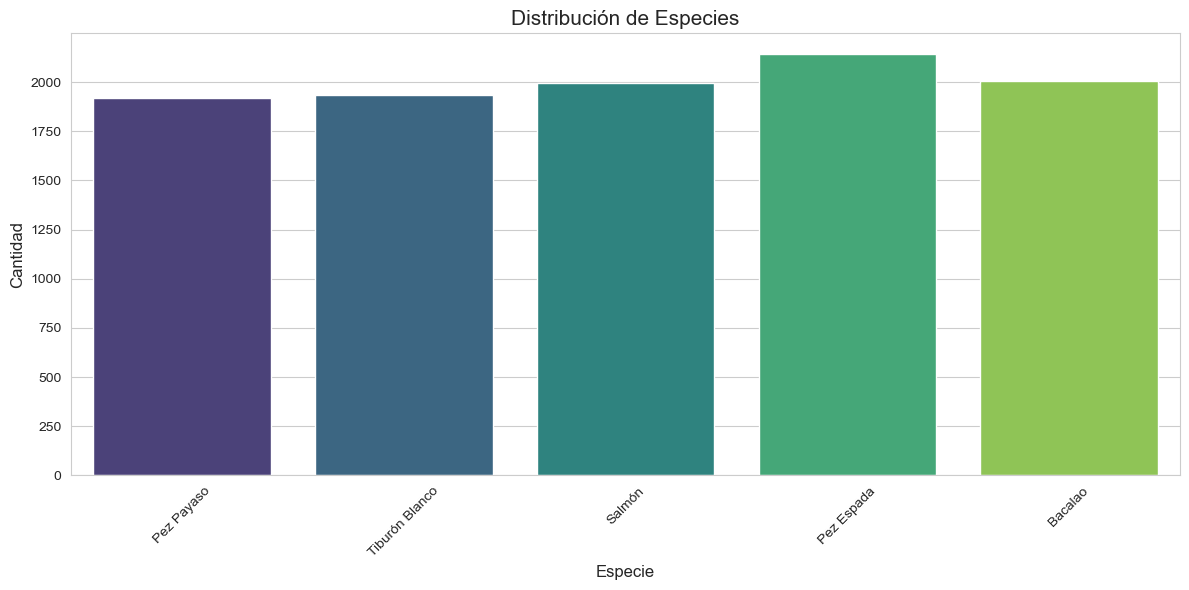

In [23]:
#Distribución de especies: Un gráfico de barras que muestra la cantidad de cada especie en el conjunto de datos.

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set_style("whitegrid")

# Plotting the distribution of species
plt.figure(figsize=(12, 6))
sns.countplot(data=df_marino, x='Especie', palette='viridis')
plt.title('Distribución de Especies', fontsize=15)
plt.xlabel('Especie', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


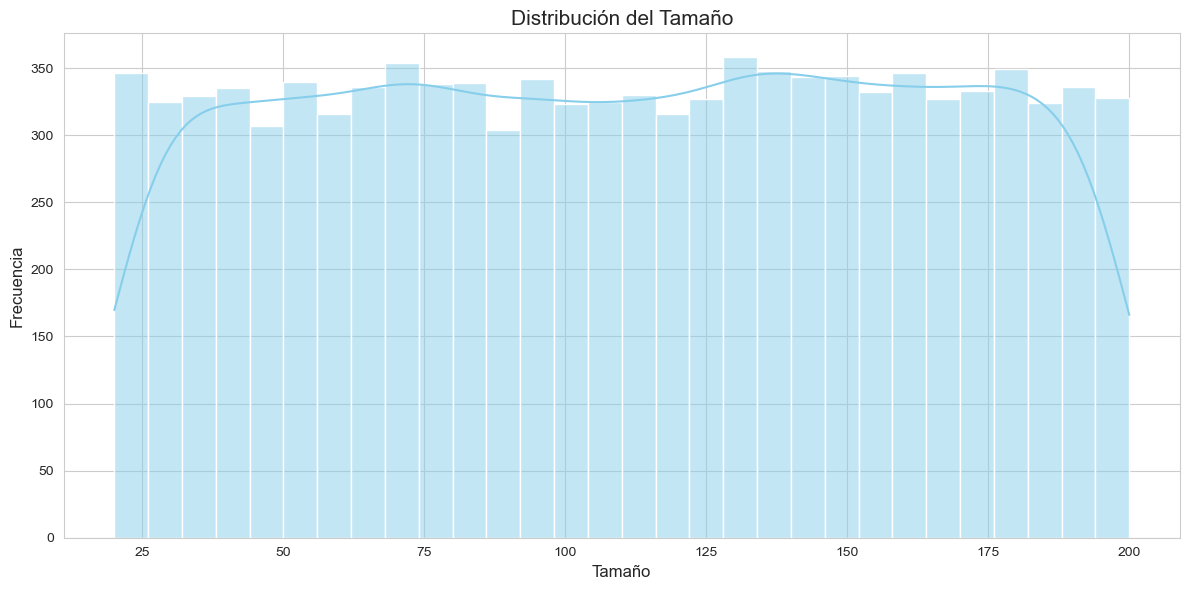

In [24]:
#histograma para la distribución del tamaño de los organismos.
# Plotting the distribution of sizes
plt.figure(figsize=(12, 6))
sns.histplot(df_marino['Tamaño'], bins=30, color='skyblue', kde=True)
plt.title('Distribución del Tamaño', fontsize=15)
plt.xlabel('Tamaño', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

#Este histograma muestra la distribución del tamaño de los organismos en el conjunto de datos. 
#Observamos que la distribución del tamaño parece ser bastante uniforme con un ligero sesgo hacia tamaños más pequeños.

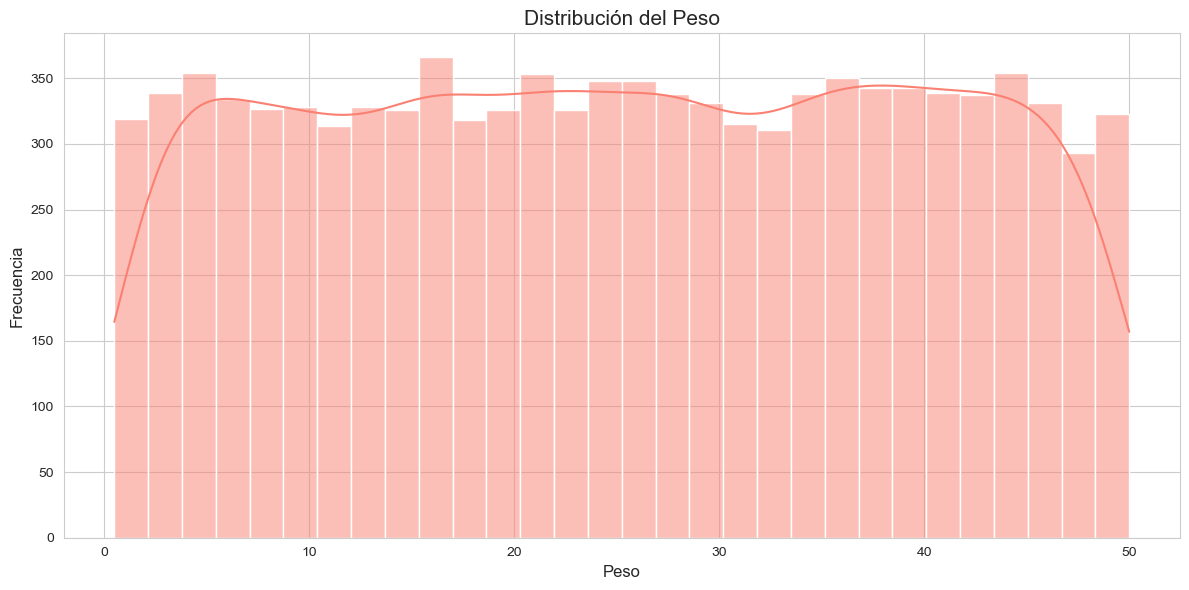

In [25]:
#distribución del peso de los organismos
# Plotting the distribution of weight
plt.figure(figsize=(12, 6))
sns.histplot(df_marino['Peso'], bins=30, color='salmon', kde=True)
plt.title('Distribución del Peso', fontsize=15)
plt.xlabel('Peso', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()
#Este histograma muestra la distribución del peso de los organismos en el conjunto de datos. 
#Podemos observar que la distribución del peso parece ser bastante uniforme a lo largo de todo el rango.

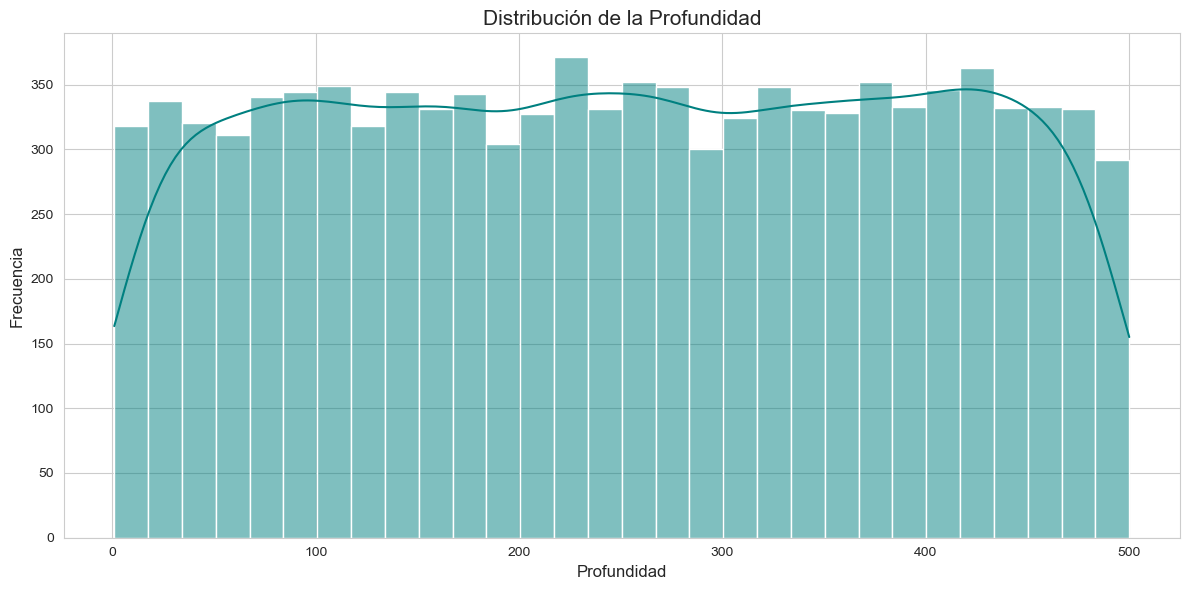

In [26]:
#distribución de la profundidad a la que se encuentran estos organismos.
# Plotting the distribution of depth
plt.figure(figsize=(12, 6))
sns.histplot(df_marino['Profundidad'], bins=30, color='teal', kde=True)
plt.title('Distribución de la Profundidad', fontsize=15)
plt.xlabel('Profundidad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()


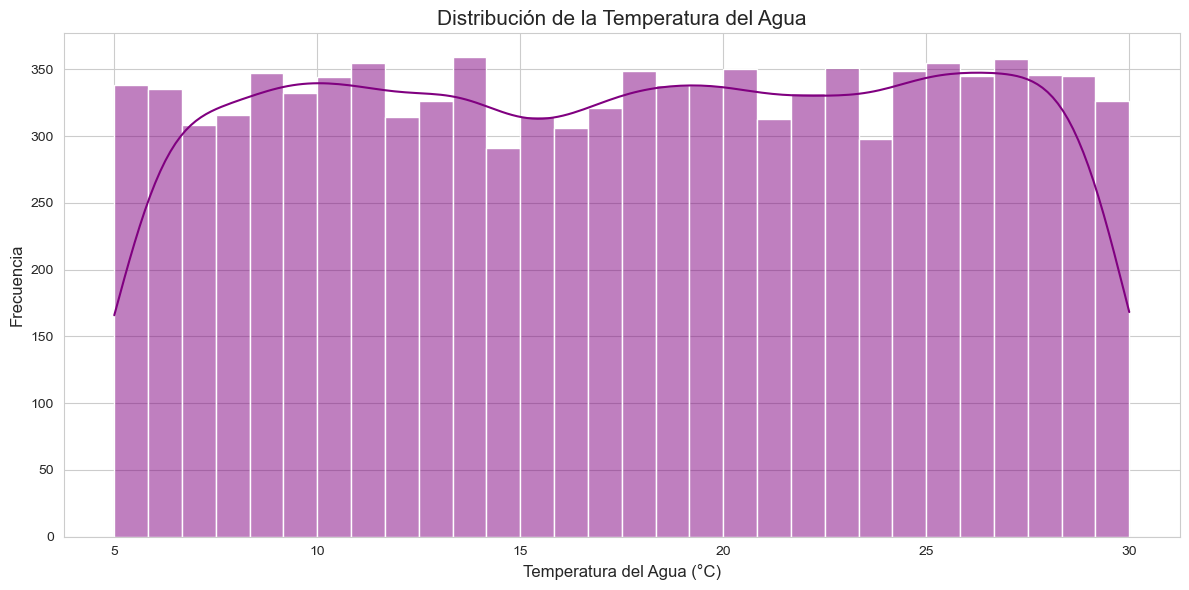

In [28]:
#distribución de las temperaturas del agua en las que se encuentran estos organismos.
# Plotting the distribution of water temperature
plt.figure(figsize=(12, 6))
sns.histplot(df_marino['Temperatura del agua'], bins=30, color='purple', kde=True)
plt.title('Distribución de la Temperatura del Agua', fontsize=15)
plt.xlabel('Temperatura del Agua (°C)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

#Este histograma muestra la distribución de las temperaturas del agua en las que se encuentran los organismos. 
#La distribución sugiere que hay una amplia gama de temperaturas del agua en las que estos organismos son encontrados, 
#con un ligero pico alrededor de los 18°C.

In [29]:
# Correlación:

In [30]:
#La correlación es una medida estadística que indica la dirección y la fuerza de la relación lineal entre dos variables cuantitativas. 
#Los valores de correlación varían entre -1 y 1. Un valor cercano a 1 implica una fuerte correlación positiva: a medida que una variable aumenta, 
#la otra también lo hace. Un valor cercano a -1 implica una fuerte correlación negativa: a medida que una variable aumenta, la otra disminuye. 
#Un valor cercano a 0 implica una débil correlación: los cambios en una variable no predicen cambios en la otra.


In [ ]:
# Calculating the correlation matrix again
correlation_matrix = df_marino.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='white')
plt.title('Mapa de Calor de Correlaciones', fontsize=15)
plt.tight_layout()
plt.show()